# EXPLORATORY DATA ANALYSIS ON "BANK MARKETING ANALYTICS"

### Dataset Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

**Attribute/Features Description:**
Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

   **•bank client attributes:**
■ age: age of client (numeric)

■ job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

■ marital : marital status (categorical: "married", "divorced", "single")

■ education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")

■ default: has credit in default? (binary/2-categories: "yes", "no")

■ balance: average yearly balance, in euros (numeric)

■ housing: has housing loan? (binary/2-categories: "yes", "no")

■ loan: has personal loan? (binary/2-categories: "yes", "no")

   **•related with the last contact of the current campaign:**
   
■ contact: contact communication type (categorical: "unknown", "telephone", "cellular")

■ day: last contact day of the month (numeric)

■ month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

■ duration: last contact duration, in seconds (numeric)

   **•other attributes:**
   
■ campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

■ pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client
was not previously contacted)

■ previous: number of contacts performed before this campaign and for this client (numeric)

■ poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

   **•Output variable (desired target):**
   
■ y: has the client subscribed a term deposit? (binary: "yes", "no") 

**IMPORTING LIBRARIES**

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
sns.set()

**LOADING DATASET INTO NOTEBOOK**

In [237]:
bank_data = pd.read_excel(r"C:\Users\maari\OneDrive\Desktop\bank\Bank_Full.xlsx")

**CHECKING THE FIRST 5 AND LAST 5 ROWS OF THE DATASET, using head() & tail()**

In [238]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [239]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


**CHECKING THE DATATYPE & OTHER INFO OF THE DATA SETS**

In [240]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [241]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [242]:
bank_data.shape     # shows total numbers of columns & rows in the data set

(45211, 17)

In [243]:
bank_data.columns  

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**CHECKING THE NULL VALUES OF DATASETS**

In [244]:
bank_data.isnull().sum() #this will return the counts of all null values from each columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**STEP.06 = RENAME THE VAROIUS COLOUMN FOR BETTER UNDERSTANDING**

In [245]:
bank_data.rename(columns = {'hosing':'Housing_Loan', 'loan':'Personal_Loan', 'duration':'Last_Call_Duration', 
                            'campaign':'Current_Camp_Contacts', 'pdays':'Contact_Day_Diff', 'previous':'Previous_Camp_Contact',
                           'poutcome':'Previous_Camp_Status', 'y':'Curr_Camp_Status'}, inplace=True)

In [246]:
bank_data.head()

,age,job,marital,education,default,balance,housing,Personal_Loan,contact,day,month,Last_Call_Duration,Current_Camp_Contacts,Contact_Day_Diff,Previous_Camp_Contact,Previous_Camp_Status,Curr_Camp_Status
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**CREATING FUNCTION FOR (AGE GROUP)**

**x(18-30):Young Adults, x(31-45):Min Age Adults, x(46-60): Veterans, x(>60): Senior Citizen**

In [247]:
bank_data['Age_Group']=bank_data['age']

In [248]:
#creating a function.
def age_group(x):
    if x>=18 and x <=30:
        return 'Young Adults'
    elif x>=31 and x<=45:
        return 'Mid Age Adults'
    elif x>=46 and x<=60:
        return 'Veterans'
    else:
        return 'Senior Citizen'

In [249]:
#applying function to the column
bank_data['Age_Group']= bank_data['Age_Group'].apply(age_group)

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

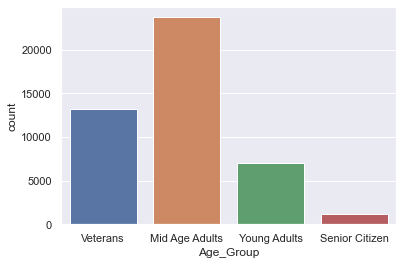

In [250]:
sns.countplot(x='Age_Group', data = bank_data)

**STE-.07=CHECKING THE VALUE COUNTS IN (JOB TYPES) & TREATING THE MISSING VALUES WITH MODE**

In [251]:
bank_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [252]:
bank_data.job.mode()   #Finding the mode, so that we can replace it with unknown entires.

0    blue-collar
Name: job, dtype: object

In [253]:
#Replacing null value with mode column by creating the function
def unknown2blue(x):
    if x=='unknown':
        return 'blue-collar'
    else:
        return x

In [254]:
bank_data['job']= bank_data['job'].apply(unknown2blue)

In [255]:
bank_data['job'].value_counts()  #Checking after replacing the unknowns with mode

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [256]:
bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

**Grouping the Job_Types into White Collar Job/ Blue Collar Job/ Entrepreneur**

In [257]:
bank_data['Job_Group']= bank_data['job']

In [258]:
#creating a function.
def job_grp(x):
    if x == 'admin.' or x == 'management' or x=='services':
        return 'White Collar'
    elif x == 'blue-collar' or x=='technician' or x == 'housemaid':
        return 'Blue Collar'
    elif x=='entrepreneur' or x == 'self-employed':
        return 'Entrepreneur'
    else:
        return x

In [259]:
#Applying the grouping function
bank_data['Job_Group']= bank_data['Job_Group'].apply(job_grp)

In [260]:
#checking the result after applying the function.
bank_data['Job_Group'].value_counts()

Blue Collar     18857
White Collar    18783
Entrepreneur     3066
retired          2264
unemployed       1303
student           938
Name: Job_Group, dtype: int64

**STEP.08= CHECKING AND TREATING THE MISSING VALUES FROM EDUCATION COLUMN**

In [261]:
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [262]:
bank_data.education.mode()  #finding the mode of education

0    secondary
Name: education, dtype: object

**The above result shows there are 928 unknown entries, to treat them we need to replace them with MODE of the column**

In [263]:
#Replacing null value with mode column by creating the function
def unknown2sec(x):
    if x =="unknown":
        return 'secondary'
    else:
        return x

In [264]:
bank_data['education']=bank_data['education'].apply(unknown2sec)        #Applying the function to replace the unknown.

In [265]:
bank_data['education'].value_counts()   #checking the result after removing the null values.

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

**STEP.07.5= CONVERTING THE VALUES IN THE Last_Call_Duration COLUMN FROM SECONDS TO MINTUES & ROUNDING TO 0.**

In [266]:
#dividing the column with 60 to get values in minutes and using .round(0) function.
bank_data['Last_Call_Duration'] = (bank_data['Last_Call_Duration']/60).round(0)

In [267]:
#checking the changes in Last_Call_Dur column
bank_data

,age,job,marital,education,default,balance,housing,Personal_Loan,contact,day,month,Last_Call_Duration,Current_Camp_Contacts,Contact_Day_Diff,Previous_Camp_Contact,Previous_Camp_Status,Curr_Camp_Status,Age_Group,Job_Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.0,1,-1,0,unknown,no,Veterans,White Collar
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,3.0,1,-1,0,unknown,no,Mid Age Adults,Blue Collar
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.0,1,-1,0,unknown,no,Mid Age Adults,Entrepreneur
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,2.0,1,-1,0,unknown,no,Veterans,Blue Collar
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,3.0,1,-1,0,unknown,no,Mid Age Adults,Blue Collar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,16.0,3,-1,0,unknown,yes,Veterans,Blue Collar
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,8.0,2,-1,0,unknown,yes,Senior Citizen,retired
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,19.0,5,184,3,success,yes,Senior Citizen,retired
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,8.0,4,-1,0,unknown,no,Veterans,Blue Collar


In [268]:
bank_data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [269]:
#finding the mode of contact
bank_data.contact.mode()

0    cellular
Name: contact, dtype: object

In [270]:
#Replacing null value with mode column by creating the function
def unknown2cell(x):
    if x =="unknown":
        return 'cellular'
    else:
        return x

In [271]:
bank_data['contact'] = bank_data['contact'].apply(unknown2cell)

In [272]:
bank_data.head()

,age,job,marital,education,default,balance,housing,Personal_Loan,contact,day,month,Last_Call_Duration,Current_Camp_Contacts,Contact_Day_Diff,Previous_Camp_Contact,Previous_Camp_Status,Curr_Camp_Status,Age_Group,Job_Group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,4.0,1,-1,0,unknown,no,Veterans,White Collar
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,3.0,1,-1,0,unknown,no,Mid Age Adults,Blue Collar
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1.0,1,-1,0,unknown,no,Mid Age Adults,Entrepreneur
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,2.0,1,-1,0,unknown,no,Veterans,Blue Collar
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,3.0,1,-1,0,unknown,no,Mid Age Adults,Blue Collar


**GROUPING THE Current_Camp_Contact Column**

**•cosidered value >0 and <=1 as Upto 1 Contacts**

**•considered value >2 and <= 5 as upto 5 Contacts**

**•considered value >6 and <= 15 as upto 15 Contacts**

**•considered value >16 and <= 30 as upto 30 Contacts**

**•considered value >31 and <= 50 as upto 50 Contacts**

**•considered value >50  as more than 50 Contacts**

In [273]:
#creating a function.
def cont_grp(x):
    if x >0 and x<=1 :
        return 'Upto 1 Contacts'
    elif x >=2 and x<= 5:
        return 'upto 5 Contacts'
    elif x >=6 and x<= 15:
        return 'upto 15 Contacts'
    elif x >=16 and x<= 30:
        return 'upto 30 Contacts'
    elif x >=31 and x<= 50:
        return 'upto 50 Contacts'
    else:
        return 'more than 50 Contacts'

In [274]:
bank_data['Current_Camp_Contacts']= bank_data['Current_Camp_Contacts'].apply(cont_grp)

In [275]:
bank_data['Current_Camp_Contacts'].value_counts()

upto 5 Contacts          23312
Upto 1 Contacts          17544
upto 15 Contacts          3825
upto 30 Contacts           471
upto 50 Contacts            55
more than 50 Contacts        4
Name: Current_Camp_Contacts, dtype: int64

**STEP.07.10= OPERATING THE Previous_camp_Status COLUMN**

**•We need to the check the view counts and uniqueness of the entries**

**•Replacing null values (i.e 'unknown') with not contacted and (others) with failure**

In [276]:
bank_data['Previous_Camp_Status'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [277]:
bank_data['Previous_Camp_Status'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: Previous_Camp_Status, dtype: int64

In [278]:
#replacing the unwanted records: unknown=Not Contacted, other=failure
bank_data['Previous_Camp_Status'] = bank_data['Previous_Camp_Status'].replace('unknown', 'Not Contacted').replace('other','failure')

In [279]:
#Checking the changes after replacement
bank_data['Previous_Camp_Status'].value_counts()

Not Contacted    36959
failure           6741
success           1511
Name: Previous_Camp_Status, dtype: int64

In [280]:
bank_data.head()

,age,job,marital,education,default,balance,housing,Personal_Loan,contact,day,month,Last_Call_Duration,Current_Camp_Contacts,Contact_Day_Diff,Previous_Camp_Contact,Previous_Camp_Status,Curr_Camp_Status,Age_Group,Job_Group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,4.0,Upto 1 Contacts,-1,0,Not Contacted,no,Veterans,White Collar
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,3.0,Upto 1 Contacts,-1,0,Not Contacted,no,Mid Age Adults,Blue Collar
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1.0,Upto 1 Contacts,-1,0,Not Contacted,no,Mid Age Adults,Entrepreneur
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,2.0,Upto 1 Contacts,-1,0,Not Contacted,no,Veterans,Blue Collar
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,3.0,Upto 1 Contacts,-1,0,Not Contacted,no,Mid Age Adults,Blue Collar


**OPERATING THE Curr_Camp_Status COLUMN**

**•Replacing yes = Subscribed & no = Not Subscribed**

In [281]:
bank_data.Curr_Camp_Status = bank_data.Curr_Camp_Status.replace('yes','Subscribed').replace('no','Not Subscribed')

In [282]:
bank_data.Curr_Camp_Status.value_counts()

Not Subscribed    39922
Subscribed         5289
Name: Curr_Camp_Status, dtype: int64

In [283]:
bank_data.to_csv('Final_Bank_Data.csv')